In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle

/content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle


In [ ]:
!ls  

flowers  flowers-recognition.zip  History  kaggle.json	Model  SplitData


In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#!unzip "/content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle/flowers-recognition.zip" -d "/content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle"

In [ ]:
!ls

flowers  flowers-recognition.zip  History  kaggle.json	Model  SplitData


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras import layers,models

In [ ]:
%mkdir SplitData

mkdir: cannot create directory ‘SplitData’: File exists


In [ ]:
!pip install split_folders
import splitfolders
#input_folder = '/content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle/flowers'
#output = '/content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle/SplitData'
#splitfolders.ratio(input_folder, output = output, seed=1337, ratio=(.8, .19, .01))

In [ ]:
%cd '/content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle/flowers'

/content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle/flowers


In [ ]:
!ls

daisy  dandelion  rose	sunflower  tulip


In [ ]:
base_dir = '/content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle/SplitData'
test_dir = os.path.join(base_dir,'test')
train_dir = os.path.join(base_dir,'train') 
val_dir = os.path.join(base_dir,'val')

train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_rose_dir = os.path.join(train_dir, 'rose')
train_sunflower_dir = os.path.join(train_dir, 'sunflower')
train_tulip_dir = os.path.join(train_dir, 'tulip')

test_daisy_dir = os.path.join(test_dir, 'daisy')
test_dandelion_dir = os.path.join(test_dir, 'dandelion')
test_rose_dir = os.path.join(test_dir, 'rose')
test_sunflower_dir = os.path.join(test_dir, 'sunflower')
test_tulip_dir = os.path.join(test_dir, 'tulip')

val_daisy_dir = os.path.join(val_dir, 'daisy')
val_dandelion_dir = os.path.join(val_dir, 'dandelion')
val_rose_dir = os.path.join(val_dir, 'rose')
val_sunflower_dir = os.path.join(val_dir, 'sunflower')
val_tulip_dir = os.path.join(val_dir, 'tulip')

In [ ]:
print('Train : ')
print('Train Daisy :', len(os.listdir(train_daisy_dir)))
print('Train Dandelion : ', len(os.listdir(train_dandelion_dir)))
print('Train Rose : ', len(os.listdir(train_rose_dir)))
print('Train Sunflower : ', len(os.listdir(train_sunflower_dir)))
print('Train Tulip : ', len(os.listdir(train_tulip_dir)))
print(""*2)
print('Validation : ')
print('Validation Daisy :', len(os.listdir(val_daisy_dir)))
print('Validation Dandelion : ', len(os.listdir(val_dandelion_dir)))
print('Validation Rose : ', len(os.listdir(val_rose_dir)))
print('Validation Sunflower : ', len(os.listdir(val_sunflower_dir)))
print('Validation Tulip : ', len(os.listdir(val_tulip_dir)))
print(""*2)
print('Test : ')
print('Test Daisy :', len(os.listdir(test_daisy_dir)))
print('Test Dandelion : ', len(os.listdir(test_dandelion_dir)))
print('Test Rose : ', len(os.listdir(test_rose_dir)))
print('Test Sunflower : ', len(os.listdir(test_sunflower_dir)))
print('Test Tulip : ', len(os.listdir(test_tulip_dir)))

Train : 
Train Daisy : 611
Train Dandelion :  841
Train Rose :  627
Train Sunflower :  586
Train Tulip :  787

Validation : 
Validation Daisy : 145
Validation Dandelion :  199
Validation Rose :  148
Validation Sunflower :  139
Validation Tulip :  186

Test : 
Test Daisy : 8
Test Dandelion :  12
Test Rose :  9
Test Sunflower :  8
Test Tulip :  11


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

height = 250
width = 250
batch_size = 32

generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    val_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 3452 images belonging to 5 classes.
Found 817 images belonging to 5 classes.
Found 48 images belonging to 5 classes.


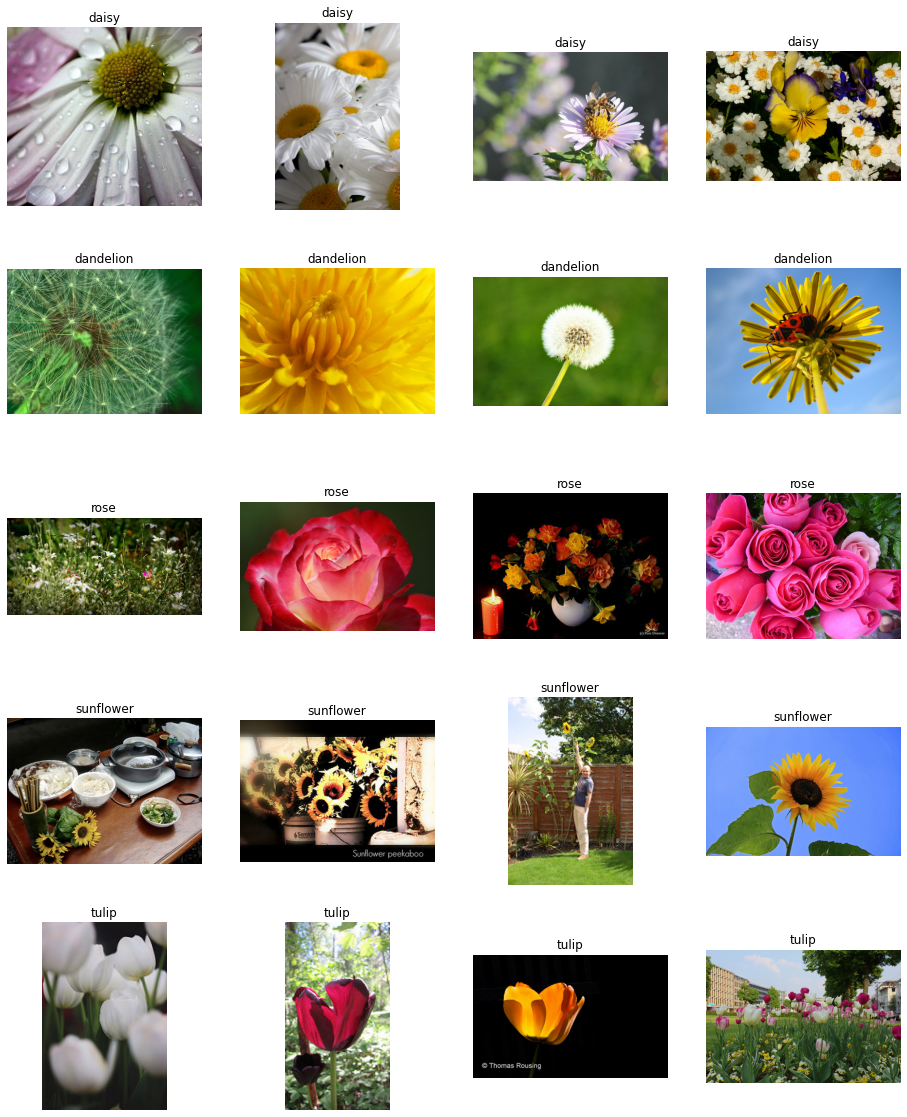

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 5
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 25
daisy_img = [os.path.join(train_daisy_dir, fname) 
                for fname in os.listdir(train_daisy_dir)[pic_index-4:pic_index]]
dandelion_img  = [os.path.join(train_dandelion_dir, fname) 
                for fname in os.listdir(train_dandelion_dir)[pic_index-4:pic_index]]
rose_img = [os.path.join(train_rose_dir, fname) 
                for fname in os.listdir(train_rose_dir)[pic_index-4:pic_index]]
sunflower_img  = [os.path.join(train_sunflower_dir, fname) 
                for fname in os.listdir(train_sunflower_dir)[pic_index-4:pic_index]]
tulip_img  = [os.path.join(train_tulip_dir, fname) 
                for fname in os.listdir(train_tulip_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(daisy_img+dandelion_img+rose_img+sunflower_img+tulip_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

In [ ]:
#Import library yang dibutuhkan
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))


model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())


# Fully Connected Layer
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization()),
model.add(Dropout(0.4))

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization()),
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 250, 250, 64)      1792      
                                                                 
 average_pooling2d_8 (Averag  (None, 125, 125, 64)     0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 dropout_10 (Dropout)        (None, 125, 125, 128)     0         
                                                                 
 average_pooling2d_9 (Averag  (None, 63, 63, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 63, 63, 256)      

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch= 10, epochs=100, validation_data=validation_generator)

Epoch 1/100
10/10 [==============================] - 263s 27s/step - loss: 2.6515 - acc: 0.2500 - val_loss: 1.6372 - val_acc: 0.2619
Epoch 2/100
10/10 [==============================] - 232s 24s/step - loss: 2.1291 - acc: 0.2656 - val_loss: 1.6529 - val_acc: 0.1701
Epoch 3/100
10/10 [==============================] - 235s 25s/step - loss: 2.0739 - acc: 0.3094 - val_loss: 1.6258 - val_acc: 0.2277
Epoch 4/100
10/10 [==============================] - 234s 24s/step - loss: 1.8591 - acc: 0.3639 - val_loss: 2.0633 - val_acc: 0.1750
Epoch 5/100
10/10 [==============================] - 232s 24s/step - loss: 1.9147 - acc: 0.3500 - val_loss: 1.6310 - val_acc: 0.2864
Epoch 6/100
10/10 [==============================] - 235s 24s/step - loss: 1.8302 - acc: 0.3406 - val_loss: 1.5473 - val_acc: 0.3048
Epoch 7/100
10/10 [==============================] - 230s 24s/step - loss: 2.0347 - acc: 0.3481 - val_loss: 1.5878 - val_acc: 0.2020
Epoch 8/100
10/10 [==============================] - 234s 24s/step - 

In [ ]:
%cd /content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle

In [ ]:
%mkdir Model

In [ ]:
from keras.models import model_from_json
import json
target_dir = "/content/gdrive/MyDrive/Tugas Besar ML ke 2 /Kaggle/Model"

# simpan history model pertama
history_dict = history.history
json.dump(history_dict, open(target_dir + '/history1.json', 'w'))

# simpan model pertama dan weight-nya
model.save(target_dir + '/model_kesatu.h5')
model.save_weights(target_dir + '/model_kesatu_weights.h5')

In [ ]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, batch_size)

print("accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("Loss: ",test_score[0])

In [ ]:
#Print Classification Report
#Print the Target names
import numpy as np
from sklearn.metrics import classification_report

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))